In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("../../data/covid19/covid19mexico.csv.gz",index_col=0)


c:\Users\TEST\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-07-18,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,México,97,97
1,2023-07-18,9edc59,2,12,7,1,7,7,108,1,...,2,2,97,2,97,6,99,México,97,97
2,2023-07-18,72b451,1,12,22,1,22,22,6,1,...,2,1,2,1,2,7,99,México,97,97
3,2023-07-18,dd7e13,2,6,16,2,16,16,112,1,...,2,2,97,1,1,3,99,México,97,97
4,2023-07-18,62dc8d,2,12,7,2,7,7,64,1,...,2,2,97,2,97,6,99,México,97,97


In [5]:
df.shape

(985570, 40)

In [6]:
list(df.columns)

['FECHA_ACTUALIZACION',
 'ID_REGISTRO',
 'ORIGEN',
 'SECTOR',
 'ENTIDAD_UM',
 'SEXO',
 'ENTIDAD_NAC',
 'ENTIDAD_RES',
 'MUNICIPIO_RES',
 'TIPO_PACIENTE',
 'FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA_LENGUA_INDIG',
 'INDIGENA',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUSUPR',
 'HIPERTENSION',
 'OTRA_COM',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL_CRONICA',
 'TABAQUISMO',
 'OTRO_CASO',
 'TOMA_MUESTRA_LAB',
 'RESULTADO_LAB',
 'TOMA_MUESTRA_ANTIGENO',
 'RESULTADO_ANTIGENO',
 'CLASIFICACION_FINAL',
 'MIGRANTE',
 'PAIS_NACIONALIDAD',
 'PAIS_ORIGEN',
 'UCI']

In [7]:
# Spanish Columns Name -> English
tr_cols = """FECHA_ACTUALIZACION -> DATE_UPDATES;\
ID_REGISTRO -> REGISTRATION_ID;\
ORIGEN -> ORIGEN;\
SECTOR -> SECTOR;\
ENTIDAD_UM -> ENTITY_ONE;\
SEXO -> SEX;\
ENTIDAD_NAC -> ENTITY_NAC;\
ENTIDAD_RES -> ENTITY_RES;\
MUNICIPIO_RES -> MUNICIPAL_RES;\
TIPO_PACIENTE -> PATIENT_TYPE;\
FECHA_INGRESO -> ADMISSION DATE;\
FECHA_SINTOMAS -> CLOSE_SYMPTOMS;\
FECHA_DEF -> CLOSE_DEF;\
INTUBADO -> INTUBATED;\
NEUMONIA -> PNEUMONIA;\
EDAD -> AGE;\
NACIONALIDAD -> NATIONALITY;\
EMBARAZO -> PREGNANCY;\
HABLA_LENGUA_INDIG -> SPEAK_INDIG_LANGUAGE;\
INDIGENA -> INDIGENOUS;\
DIABETES -> DIABETES;\
EPOC -> COPD;\
ASMA -> ASMA;\
INMUSUPR -> INMUSUPR;\
HIPERTENSION -> HYPERTENSION;\
OTRA_COM -> OTHER_COM;\
CARDIOVASCULAR -> CARDIOVASCULAR;\
OBESIDAD -> OBESITY;\
RENAL_CRONICA -> CRONIC RENALS;\
TABAQUISMO -> SMOKING;\
OTRO_CASO -> ANOTHER CASE;\
TOMA_MUESTRA_LAB -> TAKE_SAMPLE_LAB;\
RESULTADO_LAB -> RESULT_LAB;\
TOMA_MUESTRA_ANTIGENO -> TAKE_SAMPLE_ANTIGEN;\
RESULTADO_ANTIGENO -> ANTIGEN_RESULT;\
CLASIFICACION_FINAL -> FINAL_CLASSIFICATION;\
MIGRANTE -> MIGRANT;\
PAIS_NACIONALIDAD -> COUNTRY_NATIONALITY;\
PAIS_ORIGEN -> PAIS_ORIGEN;\
UCI -> UCI"""

In [8]:
tr_pairs = tr_cols.split(';')

In [9]:
tr_pairs

['FECHA_ACTUALIZACION -> DATE_UPDATES',
 'ID_REGISTRO -> REGISTRATION_ID',
 'ORIGEN -> ORIGEN',
 'SECTOR -> SECTOR',
 'ENTIDAD_UM -> ENTITY_ONE',
 'SEXO -> SEX',
 'ENTIDAD_NAC -> ENTITY_NAC',
 'ENTIDAD_RES -> ENTITY_RES',
 'MUNICIPIO_RES -> MUNICIPAL_RES',
 'TIPO_PACIENTE -> PATIENT_TYPE',
 'FECHA_INGRESO -> ADMISSION DATE',
 'FECHA_SINTOMAS -> CLOSE_SYMPTOMS',
 'FECHA_DEF -> CLOSE_DEF',
 'INTUBADO -> INTUBATED',
 'NEUMONIA -> PNEUMONIA',
 'EDAD -> AGE',
 'NACIONALIDAD -> NATIONALITY',
 'EMBARAZO -> PREGNANCY',
 'HABLA_LENGUA_INDIG -> SPEAK_INDIG_LANGUAGE',
 'INDIGENA -> INDIGENOUS',
 'DIABETES -> DIABETES',
 'EPOC -> COPD',
 'ASMA -> ASMA',
 'INMUSUPR -> INMUSUPR',
 'HIPERTENSION -> HYPERTENSION',
 'OTRA_COM -> OTHER_COM',
 'CARDIOVASCULAR -> CARDIOVASCULAR',
 'OBESIDAD -> OBESITY',
 'RENAL_CRONICA -> CRONIC RENALS',
 'TABAQUISMO -> SMOKING',
 'OTRO_CASO -> ANOTHER CASE',
 'TOMA_MUESTRA_LAB -> TAKE_SAMPLE_LAB',
 'RESULTADO_LAB -> RESULT_LAB',
 'TOMA_MUESTRA_ANTIGENO -> TAKE_SAMPLE_ANT

In [10]:
eng_cols,sp_cols = [],[]
for cols in tr_pairs:
    eng_name = cols.split(' ')
    eng = eng_name[-1]
    sp = eng_name[0]
    sp_cols.append(sp)
    eng_cols.append(eng)

In [11]:
eng_cols

['DATE_UPDATES',
 'REGISTRATION_ID',
 'ORIGEN',
 'SECTOR',
 'ENTITY_ONE',
 'SEX',
 'ENTITY_NAC',
 'ENTITY_RES',
 'MUNICIPAL_RES',
 'PATIENT_TYPE',
 'DATE',
 'CLOSE_SYMPTOMS',
 'CLOSE_DEF',
 'INTUBATED',
 'PNEUMONIA',
 'AGE',
 'NATIONALITY',
 'PREGNANCY',
 'SPEAK_INDIG_LANGUAGE',
 'INDIGENOUS',
 'DIABETES',
 'COPD',
 'ASMA',
 'INMUSUPR',
 'HYPERTENSION',
 'OTHER_COM',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENALS',
 'SMOKING',
 'CASE',
 'TAKE_SAMPLE_LAB',
 'RESULT_LAB',
 'TAKE_SAMPLE_ANTIGEN',
 'ANTIGEN_RESULT',
 'FINAL_CLASSIFICATION',
 'MIGRANT',
 'COUNTRY_NATIONALITY',
 'PAIS_ORIGEN',
 'UCI']

In [12]:
#Change column names
df.columns = eng_cols

In [13]:
df.head()

,DATE_UPDATES,REGISTRATION_ID,ORIGEN,SECTOR,ENTITY_ONE,SEX,ENTITY_NAC,ENTITY_RES,MUNICIPAL_RES,PATIENT_TYPE,...,CASE,TAKE_SAMPLE_LAB,RESULT_LAB,TAKE_SAMPLE_ANTIGEN,ANTIGEN_RESULT,FINAL_CLASSIFICATION,MIGRANT,COUNTRY_NATIONALITY,PAIS_ORIGEN,UCI
0,2023-07-18,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,México,97,97
1,2023-07-18,9edc59,2,12,7,1,7,7,108,1,...,2,2,97,2,97,6,99,México,97,97
2,2023-07-18,72b451,1,12,22,1,22,22,6,1,...,2,1,2,1,2,7,99,México,97,97
3,2023-07-18,dd7e13,2,6,16,2,16,16,112,1,...,2,2,97,1,1,3,99,México,97,97
4,2023-07-18,62dc8d,2,12,7,2,7,7,64,1,...,2,2,97,2,97,6,99,México,97,97


In [14]:
# Drop some unnecessary columns
# Dropping column names:
# DATE_UPDATES, REGISTRATION_ID,ENTITY_NAC,ENTITY_RES,MUNICIPAL_RES,
# ORIGEN,SECTOR,ENTITY_ONE,DATE,CLOSE_SYMPTOMS,CLOSE_DEF,NATIONALITY,
# SPEAK_INDIG_LANGUAGE,INDIGENOUS,CASE,TAKE_SAMPLE_LAB,RESULT_LAB,
# TAKE_SAMPLE_ANTIGEN,ANTIGEN_RESULT,MIGRANT,COUNTRY_NATIONALITY,PAIS_ORIGEN,PATIENT_TYPE

In [15]:
new_df = df.drop(['DATE_UPDATES', 'REGISTRATION_ID','ENTITY_NAC','ENTITY_RES','MUNICIPAL_RES',
'ORIGEN','SECTOR','ENTITY_ONE','DATE','CLOSE_SYMPTOMS','CLOSE_DEF','NATIONALITY',
'SPEAK_INDIG_LANGUAGE','INDIGENOUS','CASE','TAKE_SAMPLE_LAB','RESULT_LAB','INTUBATED',
'TAKE_SAMPLE_ANTIGEN','ANTIGEN_RESULT','MIGRANT','COUNTRY_NATIONALITY','PAIS_ORIGEN','PATIENT_TYPE','UCI'],axis=1)

In [16]:
new_df.head(2)

,SEX,PNEUMONIA,AGE,PREGNANCY,DIABETES,COPD,ASMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,RENALS,SMOKING,FINAL_CLASSIFICATION
0,2,2,28,97,2,2,2,2,2,2,2,2,2,1,7
1,1,2,66,2,2,2,2,2,2,2,2,2,2,2,6


In [17]:
# Change the Data types to INT
new_df[['PNEUMONIA']] = df[['PNEUMONIA']].apply(pd.to_numeric)
new_df[['PREGNANCY']] = df[['PREGNANCY']].apply(pd.to_numeric) 
new_df[['DIABETES']] = df[['DIABETES']].apply(pd.to_numeric)
new_df[['COPD']] = df[['COPD']].apply(pd.to_numeric)
new_df[['ASMA']] = df[['ASMA']].apply(pd.to_numeric)
new_df[['INMUSUPR']] = df[['INMUSUPR']].apply(pd.to_numeric) 
new_df[['HYPERTENSION']] = df[['HYPERTENSION']].apply(pd.to_numeric)
new_df[['OTHER_COM']] = df[['OTHER_COM']].apply(pd.to_numeric) 

new_df[['CARDIOVASCULAR']] = df[['CARDIOVASCULAR']].apply(pd.to_numeric)
new_df[['OBESITY']] = df[['OBESITY']].apply(pd.to_numeric) 
new_df[['RENALS']] = df[['RENALS']].apply(pd.to_numeric)
new_df[['SMOKING']] = df[['SMOKING']].apply(pd.to_numeric)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985570 entries, 0 to 985569
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   SEX                   985570 non-null  int64
 1   PNEUMONIA             985570 non-null  int64
 2   AGE                   985570 non-null  int64
 3   PREGNANCY             985570 non-null  int64
 4   DIABETES              985570 non-null  int64
 5   COPD                  985570 non-null  int64
 6   ASMA                  985570 non-null  int64
 7   INMUSUPR              985570 non-null  int64
 8   HYPERTENSION          985570 non-null  int64
 9   OTHER_COM             985570 non-null  int64
 10  CARDIOVASCULAR        985570 non-null  int64
 11  OBESITY               985570 non-null  int64
 12  RENALS                985570 non-null  int64
 13  SMOKING               985570 non-null  int64
 14  FINAL_CLASSIFICATION  985570 non-null  int64
dtypes: int64(15)
memory usage: 120.3 M

In [19]:
# Convert SEX to proper numeric: Here 2 -> Male, 1 -> Female. We change 0 -> Female and 1 -> Male
# No missing entries for SEX
fem = list((new_df.loc[new_df['SEX'] == 1]).index)
new_df.loc[fem,["SEX"]] = 0 
male = list((new_df.loc[new_df['SEX'] == 2]).index)
new_df.loc[male,["SEX"]] = 1 

In [20]:
# Convert PNEUMONIA	to proper numeric: Here 2 -> NO, 1 -> YES, 99 -> "Missing". 
# We change 2 -> 0(NO), None -> "Missing"
# 5148 Missing Records For Pneumonia
nopne = list((new_df.loc[new_df['PNEUMONIA'] == 2]).index)
new_df.loc[nopne,["PNEUMONIA"]] = 0 
miss = list((new_df.loc[new_df['PNEUMONIA'] == 99]).index)
new_df.loc[miss,["PNEUMONIA"]] = None 

In [21]:
# Convert PREGNANCY	to proper numeric: Here 2 -> NO, 1 -> YES. 97,98,99 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nopre = list((new_df.loc[new_df['PREGNANCY'] == 2]).index)
new_df.loc[nopre,["PREGNANCY"]] = 0 
miss = list((new_df.loc[(new_df['PREGNANCY'] == 99) | (new_df['PREGNANCY'] == 98) | (new_df['PREGNANCY'] == 97)]).index)
new_df.loc[miss,["PREGNANCY"]] = None 

In [22]:
# Convert DIABETES	to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nodie = list((new_df.loc[new_df['DIABETES'] == 2]).index)
new_df.loc[nodie,["DIABETES"]] = 0 
miss = list((new_df.loc[(new_df['DIABETES'] == 98)]).index)
new_df.loc[miss,["DIABETES"]] = None 

In [23]:
# Convert COPD to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nocopd = list((new_df.loc[new_df['COPD'] == 2]).index)
new_df.loc[nocopd,["COPD"]] = 0 
miss = list((new_df.loc[(new_df['COPD'] == 98)]).index)
new_df.loc[miss,["COPD"]] = None 

In [24]:
# Convert ASMA to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
noasma = list((new_df.loc[new_df['ASMA'] == 2]).index)
new_df.loc[noasma,["ASMA"]] = 0 
miss = list((new_df.loc[(new_df['ASMA'] == 98)]).index)
new_df.loc[miss,["ASMA"]] = None 

In [25]:
# Convert INMUSUPR to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
noimm = list((new_df.loc[new_df['INMUSUPR'] == 2]).index)
new_df.loc[noimm,["INMUSUPR"]] = 0 
miss = list((new_df.loc[(new_df['INMUSUPR'] == 98)]).index)
new_df.loc[miss,["INMUSUPR"]] = None 

In [26]:
# Convert HYPERTENSION to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nohy = list((new_df.loc[new_df['HYPERTENSION'] == 2]).index)
new_df.loc[nohy,["HYPERTENSION"]] = 0 
miss = list((new_df.loc[(new_df['HYPERTENSION'] == 98)]).index)
new_df.loc[miss,["HYPERTENSION"]] = None 

In [27]:
# Convert OTHER_COM to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
no = list((new_df.loc[new_df['OTHER_COM'] == 2]).index)
new_df.loc[no,["OTHER_COM"]] = 0 
miss = list((new_df.loc[(new_df['OTHER_COM'] == 98)]).index)
new_df.loc[miss,["OTHER_COM"]] = None 

In [28]:
# Convert CARDIOVASCULAR to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nocar = list((new_df.loc[new_df['CARDIOVASCULAR'] == 2]).index)
new_df.loc[nocar,["CARDIOVASCULAR"]] = 0 
miss = list((new_df.loc[(new_df['CARDIOVASCULAR'] == 98)]).index)
new_df.loc[miss,["CARDIOVASCULAR"]] = None 

In [29]:
# Convert OBESITY to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
noobe = list((new_df.loc[new_df['OBESITY'] == 2]).index)
new_df.loc[noobe,["OBESITY"]] = 0 
miss = list((new_df.loc[(new_df['OBESITY'] == 98)]).index)
new_df.loc[miss,["OBESITY"]] = None 

In [30]:
# Convert RENALS to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
norene = list((new_df.loc[new_df['RENALS'] == 2]).index)
new_df.loc[norene,["RENALS"]] = 0 
miss = list((new_df.loc[(new_df['RENALS'] == 98)]).index)
new_df.loc[miss,["RENALS"]] = None 

In [31]:
# Convert SMOKING to proper numeric: Here 2 -> NO, 1 -> YES. 98 -> "Missing". 
# We change 0 -> No and None -> "Missing"
nosmo = list((new_df.loc[new_df['SMOKING'] == 2]).index)
new_df.loc[nosmo,["SMOKING"]] = 0 
miss = list((new_df.loc[(new_df['SMOKING'] == 98)]).index)
new_df.loc[miss,["SMOKING"]] = None 

In [32]:
# Convert FINAL_CLASSIFICATION to proper numeric: Here Values 1-3 mean that the patient was
# diagnosed with covid in different degrees. 
# 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
# We change 1-3 -> 1 rest all 0. 
yescov = list((new_df.loc[(new_df['FINAL_CLASSIFICATION']<4)]).index)
new_df.loc[yescov,["FINAL_CLASSIFICATION"]] = 1 
nocov = list((new_df.loc[new_df['FINAL_CLASSIFICATION']>=4]).index)
new_df.loc[nocov,["FINAL_CLASSIFICATION"]] = 0 

In [33]:
new_df["FINAL_CLASSIFICATION"].value_counts()

0    627501
1    358069
Name: FINAL_CLASSIFICATION, dtype: int64

In [34]:
new_df.shape

(985570, 15)

In [35]:
new_df.head(10)

,SEX,PNEUMONIA,AGE,PREGNANCY,DIABETES,COPD,ASMA,INMUSUPR,HYPERTENSION,OTHER_COM,CARDIOVASCULAR,OBESITY,RENALS,SMOKING,FINAL_CLASSIFICATION
0,1,0.0,28,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0,0.0,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0.0,27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,0.0,47,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,0.0,53,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,0,0.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0,0.0,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0,0.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1,0.0,33,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0,0.0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985570 entries, 0 to 985569
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SEX                   985570 non-null  int64  
 1   PNEUMONIA             980422 non-null  float64
 2   AGE                   985570 non-null  int64  
 3   PREGNANCY             572920 non-null  float64
 4   DIABETES              984625 non-null  float64
 5   COPD                  984709 non-null  float64
 6   ASMA                  984750 non-null  float64
 7   INMUSUPR              984777 non-null  float64
 8   HYPERTENSION          984727 non-null  float64
 9   OTHER_COM             978704 non-null  float64
 10  CARDIOVASCULAR        984743 non-null  float64
 11  OBESITY               984810 non-null  float64
 12  RENALS                984742 non-null  float64
 13  SMOKING               984695 non-null  float64
 14  FINAL_CLASSIFICATION  985570 non-null  int64  
dtype

In [37]:
new_cols = list(new_df.columns)

In [38]:
#df.to_csv('covid19mexico.csv.gz', compression='gzip',index=False)
new_df.FINAL_CLASSIFICATION.value_counts()

0    627501
1    358069
Name: FINAL_CLASSIFICATION, dtype: int64

In [39]:
TRAIN_FRACTION = 0.5
RANDOM_SEED = 56732
train_df = new_df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=RANDOM_SEED)
 
imp.fit(train_df[new_cols[:-1]])
train_x_df = imp.transform(train_df[new_cols[:-1]])
### Add y train 
train_y_df = train_df[new_cols[-1]]

In [41]:
# display(train_df.info())
# display(pd.DataFrame(train_x_df,columns=new_cols[:-1]).info())

In [42]:
# train_df.FINAL_CLASSIFICATION.value_counts()

In [43]:
# train_df.index

In [87]:
test_df = new_df.drop(index=train_df.index)

In [45]:
import numpy as np
test_df=test_df.sample(frac=1,random_state=RANDOM_SEED)
test_collection=np.array_split(test_df,50)

In [46]:
max_depth = 50
criterion = "entropy"

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [48]:
text_df_coll = []
for test_df in test_collection:
    imp.fit(test_df[new_cols[:-1]])
    test_x_df = imp.transform(test_df[new_cols[:-1]])
    ### Add y test 
    test_y_df = test_df[new_cols[-1]]
    text_df_coll.append([test_x_df,test_y_df])

In [49]:
text_df_coll[0][1]

934556    0
83642     0
785921    0
578058    0
464034    1
         ..
681229    1
291809    0
788733    0
795304    1
699726    1
Name: FINAL_CLASSIFICATION, Length: 9856, dtype: int64

In [50]:
# stat = []
# lstat = []
accuracy_list = []
recall_list = []
precision_list = []
for depth in range(1,max_depth+1):
    iaccu = []
    irecall = []
    ipre = []
    # lmet = []
    # met = {}
    # met[depth]={}
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    dtree.fit(train_x_df,train_y_df)
    y_pred = dtree.predict(train_x_df)
    accuracy_score = 100*metrics.accuracy_score(train_y_df,y_pred)
    recall_score = 100*metrics.recall_score(train_y_df,y_pred)
    precesion_score = 100*metrics.precision_score(train_y_df,y_pred)
    # lmet.extend([depth,accuracy_score,recall_score,precesion_score])
    # met[depth]['model accuracy'] = accuracy_score
    # met[depth]['model recall'] = recall_score
    # met[depth]['precision'] = precesion_score
    iaccu.extend([depth,accuracy_score])
    irecall.extend([depth,recall_score])
    ipre.extend([depth,precesion_score])
    cnt = 1 
    for test_df in text_df_coll:
        # met[depth][f"test{cnt}"] = {}
        # imp.fit(test_df[new_cols[:-1]])
        # test_x_df = imp.transform(test_df[new_cols[:-1]])
        # ### Add y test 
        # test_y_df = test_df[new_cols[-1]]
        test_y_pred = dtree.predict(test_df[0])
        taccuracy_score = 100*metrics.accuracy_score(test_df[1],test_y_pred)
        trecall_score = 100*metrics.recall_score(test_df[1],test_y_pred)
        tprecesion_score = 100*metrics.precision_score(test_df[1],test_y_pred)
        # met[depth][f"test{cnt}"]['test accuracy'] = taccuracy_score
        # met[depth][f"test{cnt}"]['test recall'] = trecall_score
        # met[depth][f"test{cnt}"]['tprecesion_score'] = tprecesion_score
        # cnt += 1
        # lmet.extend([taccuracy_score,trecall_score,tprecesion_score])
        iaccu.append(taccuracy_score)
        irecall.append(trecall_score)
        ipre.append(tprecesion_score)
        
    # stat.append(met)
    # lstat.append(lmet)
    accuracy_list.append(iaccu)
    recall_list.append(irecall)
    precision_list.append(ipre)

c:\Users\TEST\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TEST\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TEST\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TEST\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-d

In [51]:
accuracy_list

[[1,
  63.63606846799315,
  63.63636363636363,
  63.92045454545454,
  63.12905844155844,
  64.0523538961039,
  63.58563311688312,
  62.96672077922077,
  63.8291396103896,
  63.484172077922075,
  63.524756493506494,
  64.13352272727273,
  63.75811688311688,
  63.67694805194806,
  63.34212662337663,
  63.717532467532465,
  62.98701298701299,
  64.1030844155844,
  63.930600649350644,
  63.35227272727273,
  64.6103896103896,
  63.5551948051948,
  64.35673701298701,
  63.59577922077923,
  64.00162337662337,
  63.84943181818182,
  63.72767857142857,
  63.61607142857143,
  64.24512987012987,
  63.930600649350644,
  63.28125,
  63.83928571428571,
  63.5551948051948,
  62.97686688311688,
  63.45373376623377,
  63.524756493506494,
  63.159496753246756,
  63.886352105530186,
  63.62252663622526,
  64.51547437848808,
  63.267376966007106,
  64.21106037544394,
  64.35312024353121,
  63.87620497209539,
  63.25722983257231,
  63.24708269913749,
  63.0339928970066,
  63.59208523592085,
  64.6372399797

In [52]:
# [depth, train_accuracy,test1_accuracy,test2_accuracy,....,test50_accuracy,train_recall,test1_recall,test2_recall.....,test50_recall,

In [53]:
len(accuracy_list[0])

52

In [54]:
dfcolumns = []
for i in range (len(accuracy_list[0])):
    if(i == 0):
        dfcolumns.append("Depth")
    elif(i == 1):
        dfcolumns.append("Train")
    else:
        dfcolumns.append(f"Test{i-1}")

In [55]:
dfcolumns

['Depth',
 'Train',
 'Test1',
 'Test2',
 'Test3',
 'Test4',
 'Test5',
 'Test6',
 'Test7',
 'Test8',
 'Test9',
 'Test10',
 'Test11',
 'Test12',
 'Test13',
 'Test14',
 'Test15',
 'Test16',
 'Test17',
 'Test18',
 'Test19',
 'Test20',
 'Test21',
 'Test22',
 'Test23',
 'Test24',
 'Test25',
 'Test26',
 'Test27',
 'Test28',
 'Test29',
 'Test30',
 'Test31',
 'Test32',
 'Test33',
 'Test34',
 'Test35',
 'Test36',
 'Test37',
 'Test38',
 'Test39',
 'Test40',
 'Test41',
 'Test42',
 'Test43',
 'Test44',
 'Test45',
 'Test46',
 'Test47',
 'Test48',
 'Test49',
 'Test50']

In [56]:
accuracyDf = pd.DataFrame(accuracy_list)
recallDf = pd.DataFrame(recall_list)
precisionDf = pd.DataFrame(precision_list)

In [57]:
accuracyDf.columns = dfcolumns
recallDf.columns = dfcolumns
precisionDf.columns = dfcolumns

In [58]:
accuracyDf

,Depth,Train,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,...,Test41,Test42,Test43,Test44,Test45,Test46,Test47,Test48,Test49,Test50
0,1,63.636068,63.636364,63.920455,63.129058,64.052354,63.585633,62.966721,63.829140,63.484172,...,64.353120,63.876205,63.257230,63.247083,63.033993,63.592085,64.637240,64.454592,63.338407,63.378995
1,2,63.636068,63.636364,63.920455,63.129058,64.052354,63.585633,62.966721,63.829140,63.484172,...,64.353120,63.876205,63.257230,63.247083,63.033993,63.592085,64.637240,64.454592,63.338407,63.378995
2,3,63.636068,63.636364,63.920455,63.129058,64.052354,63.585633,62.966721,63.829140,63.484172,...,64.353120,63.876205,63.257230,63.247083,63.033993,63.592085,64.637240,64.454592,63.338407,63.378995
3,4,63.636068,63.636364,63.920455,63.129058,64.052354,63.585633,62.966721,63.829140,63.484172,...,64.353120,63.876205,63.257230,63.247083,63.033993,63.592085,64.637240,64.454592,63.338407,63.378995
4,5,63.728604,63.605925,64.387175,63.230519,64.123377,63.697240,63.179789,64.265422,63.758117,...,64.221208,64.048706,63.734145,63.571791,63.115170,63.987823,65.002537,64.221208,63.013699,63.389143
5,6,63.792526,63.717532,64.356737,63.271104,64.153815,63.727679,63.220373,64.224838,63.849432,...,64.292237,64.129883,63.774734,63.612380,63.206494,64.048706,65.002537,64.261796,63.135464,63.378995
6,7,63.878162,63.890016,64.336445,63.372565,64.072646,63.930601,63.291396,64.133523,63.930601,...,64.556063,64.129883,63.673262,63.632674,63.378995,64.069001,65.083714,64.657534,63.074581,63.378995
7,8,63.909616,63.879870,64.306006,63.372565,64.163961,63.930601,63.311688,64.143669,64.001623,...,64.576357,64.150178,63.673262,63.470320,63.307965,64.140030,65.093861,64.667681,62.952816,63.450025
8,9,63.948172,63.737825,64.295860,62.560877,64.133523,64.011769,63.311688,64.113231,63.859578,...,64.434297,64.190766,63.632674,63.581938,63.328260,64.190766,65.022831,64.698123,62.709285,63.409437
9,10,63.975365,63.514610,64.113231,63.047890,64.092938,63.930601,63.271104,64.042208,63.839286,...,64.515474,64.129883,63.500761,63.652968,63.318113,64.180619,65.053272,64.616946,62.922374,63.307965


In [59]:
recallDf

,Depth,Train,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,...,Test41,Test42,Test43,Test44,Test45,Test46,Test47,Test48,Test49,Test50
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,7.918704,7.477679,8.239595,7.347276,7.931132,7.996656,8.027397,8.471248,8.335649,...,7.884999,7.471910,7.843137,7.979017,7.685973,8.500557,8.522238,7.536397,6.974813,7.758382
5,6,7.654747,7.338170,7.874016,7.017061,7.535986,7.745890,7.863014,8.050491,8.002223,...,7.742670,7.106742,7.511737,7.730536,7.411474,8.305463,8.177905,7.250928,6.836424,7.453588
6,7,6.126253,6.026786,6.130484,5.531095,5.927180,6.324882,6.383562,6.227209,6.612948,...,6.404782,5.702247,6.020436,6.156819,6.011529,6.633222,6.771879,5.994862,5.231110,5.652535
7,8,5.787518,5.552455,5.568054,5.063291,5.757832,5.906938,6.054795,5.778401,6.279522,...,6.177057,5.365169,5.771886,5.687465,5.572330,6.326644,6.370158,5.652298,4.788265,5.292325
8,9,6.506284,6.389509,6.327334,8.447991,6.040079,6.965729,6.684932,6.760168,7.001945,...,7.742670,6.264045,6.655620,6.847046,6.560527,7.357860,7.345768,6.651442,6.116800,6.345248
9,10,6.601152,6.612723,6.439820,7.044579,6.096528,6.714962,6.547945,6.591865,6.863018,...,7.087959,6.151685,7.042254,6.929873,6.587977,7.246377,7.345768,6.480160,5.673955,6.400665


In [60]:
precisionDf

,Depth,Train,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,...,Test41,Test42,Test43,Test44,Test45,Test46,Test47,Test48,Test49,Test50
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,50.816502,49.721707,54.259259,50.954198,50.630631,50.976909,51.858407,53.832442,52.356021,...,48.853616,51.650485,54.510557,52.930403,50.724638,53.415061,53.225806,47.912886,47.014925,50.089445
5,6,51.445824,50.772201,54.158607,51.411290,50.954198,51.291513,52.276867,53.644860,53.333333,...,49.454545,52.598753,55.172414,53.435115,51.625239,54.083485,53.370787,48.197343,48.054475,50.000000
6,7,52.872899,53.071253,55.189873,53.174603,50.239234,54.047619,53.686636,53.623188,55.092593,...,52.325581,53.280840,55.189873,54.656863,54.207921,55.477855,55.140187,52.500000,46.782178,50.000000
7,8,53.475302,53.208556,55.307263,53.488372,51.385390,54.358974,54.166667,54.068241,56.359102,...,52.669903,53.802817,55.437666,52.820513,53.562005,56.750000,55.639098,52.800000,45.052083,50.933333
8,9,53.530762,51.116071,54.479419,45.820896,50.952381,54.585153,53.744493,53.083700,53.961456,...,50.746269,53.734940,54.157303,53.563715,53.229399,56.289979,54.008439,52.714932,43.849206,50.329670
9,10,53.802420,48.765432,52.164009,49.230769,50.467290,53.794643,53.348214,52.338530,53.812636,...,51.659751,53.026634,52.469136,54.329004,53.097345,56.277056,54.352442,51.826484,45.454545,49.253731


In [61]:
import statistics 
accu_mean=[]
accu_std = []
for i in range(len(accuracyDf)):
    test_mean = statistics.mean(accuracyDf.iloc[i,2:])
    accu_mean.append(test_mean)
    test_std = statistics.stdev(accuracyDf.iloc[i,2:])
    accu_std.append(test_std)
    

In [62]:
recall_mean=[]
recall_std = []
for i in range(len(recallDf)):
    test_mean = statistics.mean(recallDf.iloc[i,2:])
    recall_mean.append(test_mean)
    test_std = statistics.stdev(recallDf.iloc[i,2:])
    recall_std.append(test_std)

In [63]:
pre_mean=[]
pre_std = []
for i in range(len(recallDf)):
    test_mean = statistics.mean(precisionDf.iloc[i,2:])
    pre_mean.append(test_mean)
    test_std = statistics.stdev(precisionDf.iloc[i,2:])
    pre_std.append(test_std)

In [64]:
accuracyDf["Mean"] = accu_mean
accuracyDf["STD"] = accu_std
recallDf["Mean"] = recall_mean
recallDf["STD"] = recall_std
precisionDf["Mean"] = pre_mean
precisionDf["STD"] = pre_std

In [65]:
accuracyDf.to_csv("accuracydf.csv",index=False)
recallDf.to_csv("recalldf.csv",index=False)
precisionDf.to_csv("precisiondf.csv",index=False)

In [66]:
import matplotlib.pyplot as plt 

acc_x = np.array(accuracyDf["Depth"])
acc_mean = np.array(accuracyDf["Mean"])
acc_std = np.array(accuracyDf["STD"])

In [67]:
recall_x = np.array(recallDf["Depth"])
recall_mean = np.array(recallDf["Mean"])
recall_std = np.array(recallDf["STD"])

In [68]:
pre_x = np.array(precisionDf["Depth"])
pre_mean = np.array(precisionDf["Mean"])
pre_std = np.array(precisionDf["STD"])

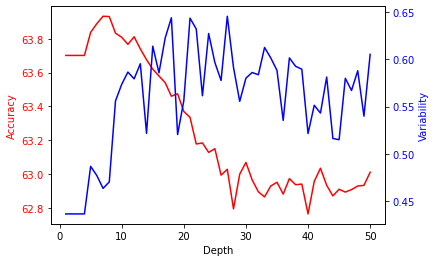

In [69]:
fig,ax1 = plt.subplots()
fig.patch.set_facecolor(color="white")
ax1.set_xlabel('Depth') 
ax1.set_ylabel('Accuracy', color = 'red') 
ax1.plot(acc_x, acc_mean, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
ax2.set_ylabel('Variability', color = 'blue') 
ax2.plot(acc_x, acc_std, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')
plt.show()

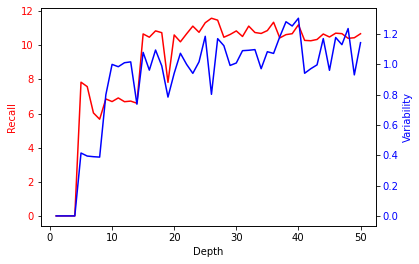

In [70]:
fig,ax1 = plt.subplots()
fig.patch.set_facecolor(color="white")
ax1.set_xlabel('Depth') 
ax1.set_ylabel('Recall', color = 'red') 
ax1.plot(recall_x, recall_mean, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
ax2.set_ylabel('Variability', color = 'blue') 
ax2.plot(recall_x, recall_std, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')
plt.show()

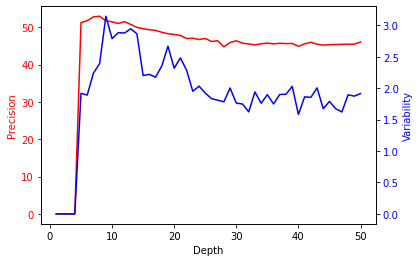

In [71]:
fig,ax1 = plt.subplots()
fig.patch.set_facecolor(color="white")
ax1.set_xlabel('Depth') 
ax1.set_ylabel('Precision', color = 'red') 
ax1.plot(pre_x, pre_mean, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
ax2.set_ylabel('Variability', color = 'blue') 
ax2.plot(pre_x, pre_std, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')
plt.show()

In [72]:
# accuracyDf = pd.read_csv(r"D:\Ganesh\ML_AI\Decision Tree\DecisionTrees\src\covid19\accuracydf.csv")
# recallDf = pd.read_csv(r"D:\Ganesh\ML_AI\Decision Tree\DecisionTrees\src\covid19\recalldf.csv")
# precisionDf = pd.read_csv(r"D:\Ganesh\ML_AI\Decision Tree\DecisionTrees\src\covid19\precisiondf.csv")

In [73]:
a_first_qua = []
a_second_qua = []
a_third_qua = []
for i in range(len(accuracyDf)):
    row = list(accuracyDf.iloc[i,2:-2:1])
    a_first_qua.append(np.percentile(row,25))
    a_second_qua.append(np.percentile(row,50))
    a_third_qua.append(np.percentile(row,75))
    

In [74]:
r_first_qua = []
r_second_qua = []
r_third_qua = []
for i in range(len(recallDf)):
    row = list(recallDf.iloc[i,2:-2:1])
    r_first_qua.append(np.percentile(row,25))
    r_second_qua.append(np.percentile(row,50))
    r_third_qua.append(np.percentile(row,75))

In [75]:
pre_first_qua = []
pre_second_qua = []
pre_third_qua = []
for i in range(len(precisionDf)):
    row = list(precisionDf.iloc[i,2:-2:1])
    pre_first_qua.append(np.percentile(row,25))
    pre_second_qua.append(np.percentile(row,50))
    pre_third_qua.append(np.percentile(row,75))

In [76]:
accuracyDf["First_Quartile"] = a_first_qua
accuracyDf["Median"] = a_second_qua
accuracyDf["Third_Quartile"] = a_third_qua
recallDf["First_Quartile"] = r_first_qua
recallDf["Median"] = r_second_qua
recallDf["Third_Quartile"] = r_third_qua
precisionDf["First_Quartile"] = pre_first_qua
precisionDf["Median"] = pre_second_qua
precisionDf["Third_Quartile"] = pre_third_qua

In [77]:
accuracyDf.to_csv("accuracydf.csv",index=False)
recallDf.to_csv("recalldf.csv",index=False)
precisionDf.to_csv("precisiondf.csv",index=False)

In [78]:
amin_error = []
amax_error = []
for i in range(len(a_first_qua)):
    amin_error.append(a_second_qua[i]-a_first_qua[i])
    amax_error.append(a_third_qua[i]-a_second_qua[i])
rmin_error = []
rmax_error = []
for i in range(len(r_first_qua)):
    rmin_error.append(r_second_qua[i]-r_first_qua[i])
    rmax_error.append(r_third_qua[i]-r_second_qua[i])
pmin_error = []
pmax_error = []
for i in range(len(pre_first_qua)):
    pmin_error.append(pre_second_qua[i]-pre_first_qua[i])
    pmax_error.append(pre_third_qua[i]-pre_second_qua[i])

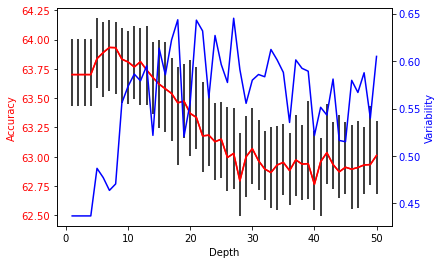

In [79]:
fig,ax1 = plt.subplots()
fig.patch.set_facecolor(color="white")
ax1.set_xlabel('Depth') 
ax1.set_ylabel('Accuracy', color = 'red') 
ax1.errorbar(acc_x,acc_mean,yerr=[amin_error,amax_error],ecolor="black",color='red')
ax1.plot(acc_x, acc_mean, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
ax2.set_ylabel('Variability', color = 'blue')
# ax2.errorbar(acc_x,acc_std,yerr=0.25) 
ax2.plot(acc_x, acc_std, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')
plt.show()

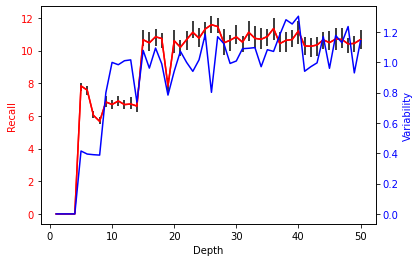

In [80]:
fig,ax1 = plt.subplots()
fig.patch.set_facecolor(color="white")
ax1.set_xlabel('Depth') 
ax1.set_ylabel('Recall', color = 'red') 
ax1.errorbar(recall_x,recall_mean,yerr=[rmin_error,rmax_error],ecolor="black",color='red')
ax1.plot(recall_x, recall_mean, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
ax2.set_ylabel('Variability', color = 'blue') 
ax2.plot(recall_x, recall_std, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')
plt.show()

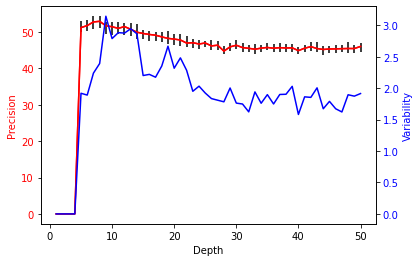

In [81]:
fig,ax1 = plt.subplots()
fig.patch.set_facecolor(color="white")
ax1.set_xlabel('Depth') 
ax1.set_ylabel('Precision', color = 'red') 
ax1.errorbar(pre_x,pre_mean,yerr=[pmin_error,pmax_error],ecolor="black",color='red')
ax1.plot(pre_x, pre_mean, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
ax2 = ax1.twinx() 
ax2.set_ylabel('Variability', color = 'blue') 
ax2.plot(pre_x, pre_std, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue')
plt.show()

In [89]:
test_df = new_df.drop(index=train_df.index)

In [91]:
test_x_df = imp.transform(test_df[new_cols[:-1]])
### Add y train 
test_y_df = test_df[new_cols[-1]]

In [93]:
from mlxtend.evaluate import bias_variance_decomp

In [95]:
tree = DecisionTreeClassifier(random_state=123,criterion="entropy",max_depth=10)

tx = np.array(train_x_df)
ty = np.array(train_y_df)
tex = np.array(test_x_df)
tey = np.array(test_y_df)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree,tx, ty, tex, tey, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

KeyboardInterrupt: 